In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import mplfinance as mpf

### Question 1: Data Loading & Inspection

##### 1 -Load the CSV data into a pandas DataFrame.

##### 2 Display the first 5 rows.

##### 3 What is the date range of the dataset?

##### 4 Check for missing values.

In [2]:
# 1. Load the dataset (Ensure 'Date' is parsed as a DateTimeIndex)
df = pd.read_csv('Ali_Baba_Stock_Data.csv', parse_dates=['Date'], index_col='Date')


In [3]:
# 2. Display the first 5 rows
df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-09-19,90.673950,93.889999,99.699997,89.949997,92.699997,271879400
2014-09-22,86.810966,89.889999,92.949997,89.500000,92.699997,66657800
2014-09-23,84.184128,87.169998,90.480003,86.620003,88.940002,39009800
2014-09-24,87.467667,90.570000,90.570000,87.220001,88.470001,32088000
2014-09-25,85.874191,88.919998,91.500000,88.500000,91.089996,28598000


In [4]:
# 3. Find the date range
start_date = df.index.min()
end_date = df.index.max()
print(f"\nDate Range: {start_date} to {end_date}")


Date Range: 2014-09-19 00:00:00 to 2025-02-13 00:00:00


In [5]:
# 4. Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


### Question 2: Basic Statistics
#### Calculate and display:

##### Mean, median, and standard deviation of Adj Close.

##### Maximum and minimum values of Volume.

##### Correlation matrix between Open, High, Low, and Close.

In [22]:
# Generate descriptive statistics for the 'Adj Close' column, including count, mean, std dev, min, max, and quartiles
adj_close_stats = df['Adj Close'].describe().round(2)
print(adj_close_stats)


count    2617.00
mean      130.76
std        56.74
min        55.42
25%        82.45
50%       105.47
75%       173.06
max       306.28
Name: Adj Close, dtype: float64


In [7]:
# 1. Calculate mean, median, and standard deviation of 'Adj Close'
adj_close_mean = df['Adj Close'].mean()
adj_close_median = df['Adj Close'].median()
adj_close_std = df['Adj Close'].std()

print(f"Adj Close - Mean: {adj_close_mean:.2f}, Median: {adj_close_median:.2f}, Std Dev: {adj_close_std:.2f}")

Adj Close - Mean: 130.76, Median: 105.47, Std Dev: 56.74


In [8]:
# 2. Find the max and min values of 'Volume'
max_volume = df['Volume'].max()
min_volume = df['Volume'].min()

print(f"\nVolume - Max: {max_volume}, Min: {min_volume}")


Volume - Max: 271879400, Min: 3775300


In [9]:
# 3. Calculate the correlation matrix for Open, High, Low, and Close
correlation_matrix = df[['Open', 'High', 'Low', 'Close']].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
           Open      High       Low     Close
Open   1.000000  0.999582  0.999546  0.999105
High   0.999582  1.000000  0.999471  0.999620
Low    0.999546  0.999471  1.000000  0.999596
Close  0.999105  0.999620  0.999596  1.000000


### Question 3: Time Series Plotting
#### Plot the Adj Close price over time using matplotlib.

##### Add a title and axis labels.

##### Highlight the date with the highest Adj Close on the plot.

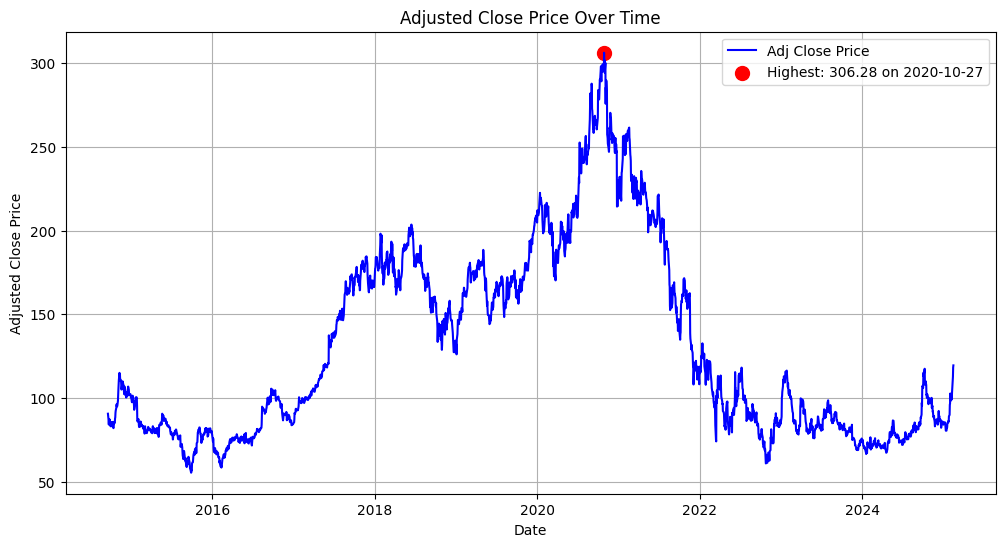

In [10]:
# Find the date with the highest Adj Close price
max_date = df['Adj Close'].idxmax()
max_price = df['Adj Close'].max()

# Plot the Adj Close price over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label='Adj Close Price', color='blue')

# Highlight the highest point
plt.scatter(max_date, max_price, color='red', marker='o', s=100, label=f'Highest: {max_price:.2f} on {max_date.date()}')

# Add title and labels
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid()

# Show the plot
plt.show()


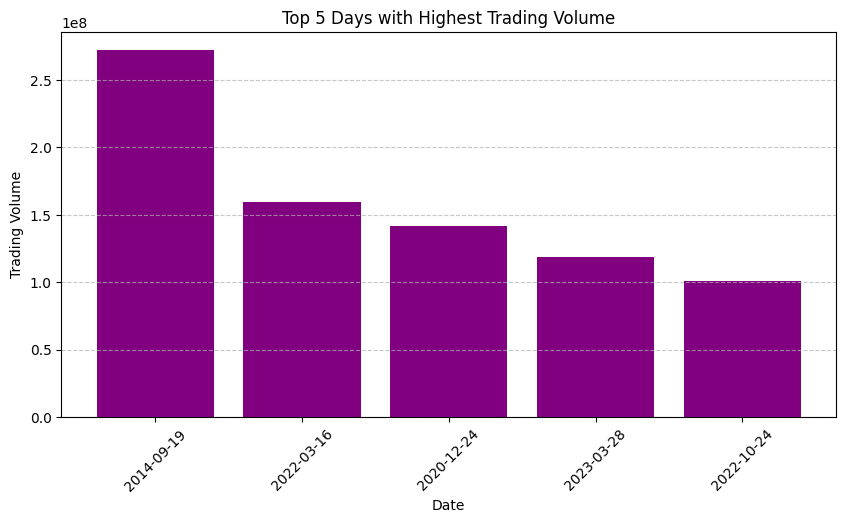

In [11]:
# Find the top 5 days with the highest trading volume
top_5_volume = df.nlargest(5, 'Volume')

# Plot the top 5 trading volume days as a bar chart
plt.figure(figsize=(10, 5))
plt.bar(top_5_volume.index.strftime('%Y-%m-%d'), top_5_volume['Volume'], color='purple')

# Add title and labels
plt.title('Top 5 Days with Highest Trading Volume')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### Question 5: Moving Averages

##### Calculate the 50-day and 200-day moving averages for Adj Close.

##### Plot them alongside the Adj Close price.

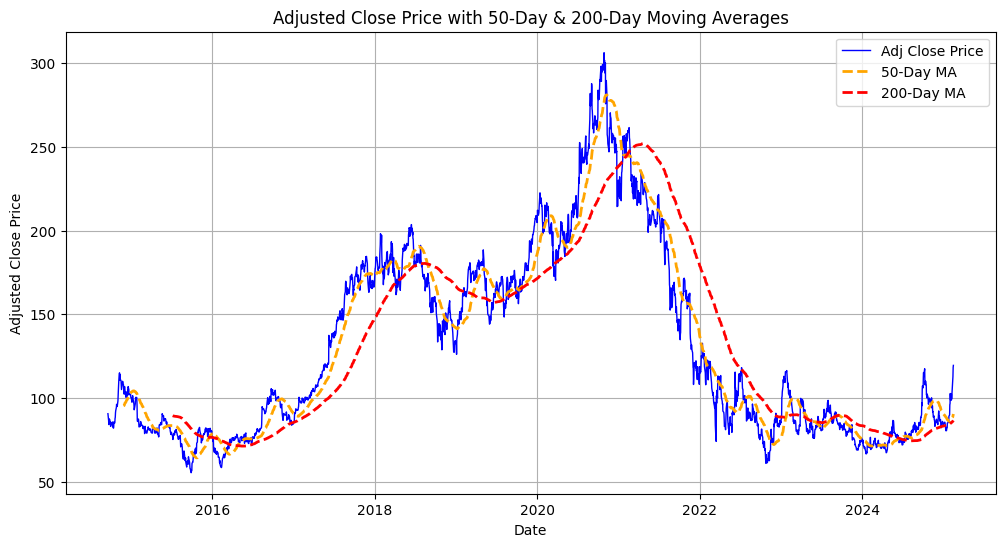

In [12]:
# Calculate 50-day and 200-day moving averages
df['50_MA'] = df['Adj Close'].rolling(window=50).mean()
df['200_MA'] = df['Adj Close'].rolling(window=200).mean()

# Plot the Adj Close price with moving averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label='Adj Close Price', color='blue', linewidth=1)
plt.plot(df.index, df['50_MA'], label='50-Day MA', color='orange', linestyle='dashed', linewidth=2)
plt.plot(df.index, df['200_MA'], label='200-Day MA', color='red', linestyle='dashed', linewidth=2)

# Add title and labels
plt.title('Adjusted Close Price with 50-Day & 200-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid()

# Show the plot
plt.show()

### Question 6: Daily Returns
##### Compute the daily percentage return using Adj Close.

##### Plot a histogram of daily returns with 50 bins.

##### What is the average daily return?

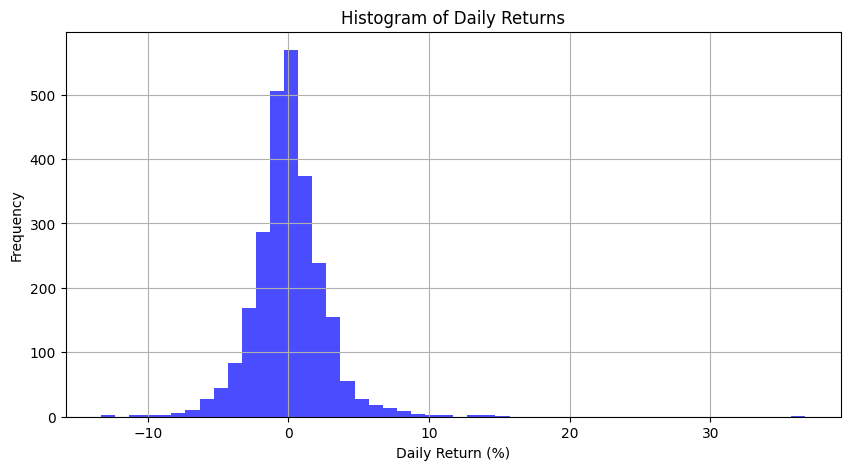

Average Daily Return: 0.0442%


In [13]:
# Compute daily percentage return
df['Daily Return'] = df['Adj Close'].pct_change() * 100  

# Plot histogram of daily returns
plt.figure(figsize=(10, 5))
plt.hist(df['Daily Return'].dropna(), bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Daily Returns")
plt.xlabel("Daily Return (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Compute the average daily return
avg_daily_return = df['Daily Return'].mean()
print(f"Average Daily Return: {avg_daily_return:.4f}%")

### Question 7: Volatility Calculation
##### Compute the rolling 30-day standard deviation of daily returns (volatility).

##### Plot the volatility over time.

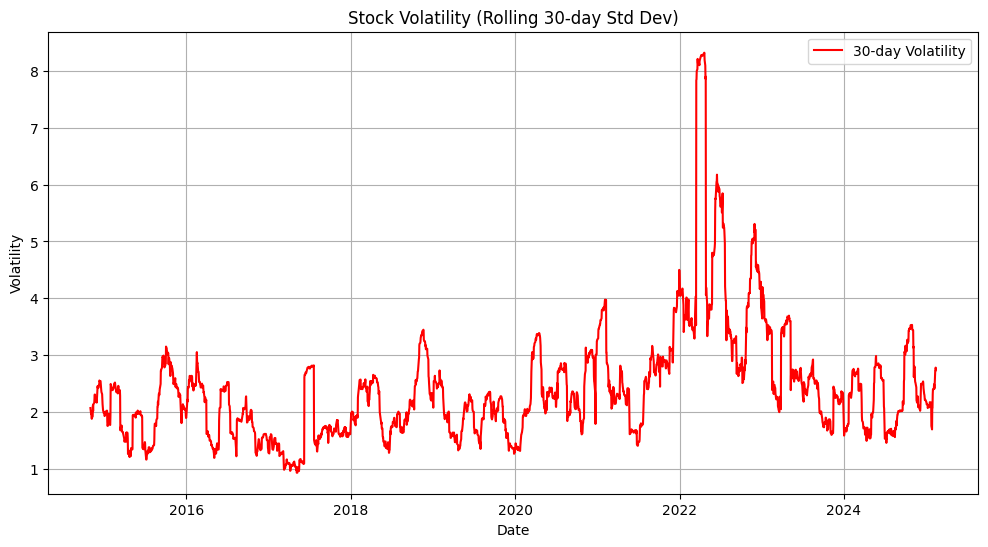

In [14]:
# Compute 30-day rolling standard deviation (volatility)
df['Volatility'] = df['Daily Return'].rolling(window=30).std()

# Plot volatility over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volatility'], color='red', label='30-day Volatility')
plt.title("Stock Volatility (Rolling 30-day Std Dev)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.show()

### Question 8: Monthly Aggregation
##### Resample the data to monthly frequency and calculate:

##### Monthly average Adj Close.

##### Monthly maximum High.

##### Monthly minimum Low.

##### Plot these aggregated values on the same graph.

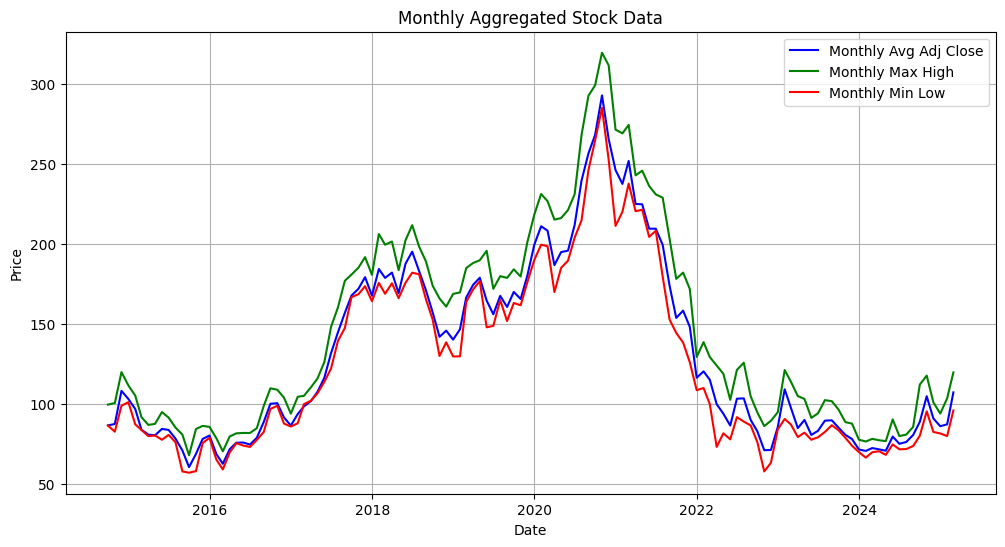

In [15]:
# Monthly resampling
monthly_df = df.resample('ME').agg({
    'Adj Close': 'mean',
    'High': 'max',
    'Low': 'min'
})

# Plot aggregated values
plt.figure(figsize=(12, 6))
plt.plot(monthly_df.index, monthly_df['Adj Close'], label='Monthly Avg Adj Close', color='blue')
plt.plot(monthly_df.index, monthly_df['High'], label='Monthly Max High', color='green')
plt.plot(monthly_df.index, monthly_df['Low'], label='Monthly Min Low', color='red')

plt.title("Monthly Aggregated Stock Data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

### Question 9: Candlestick Chart
##### Use matplotlib to create a candlestick chart for the first 90 days of data.

##### Use Open, High, Low, and Close values.



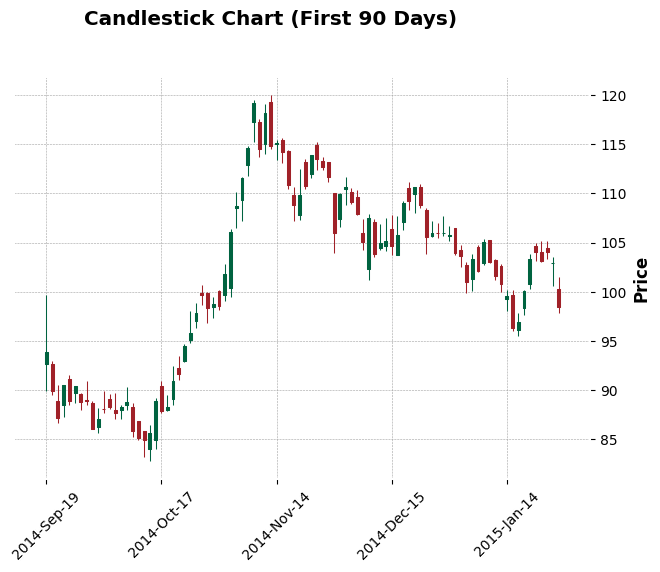

In [16]:
# Select first 90 days
candlestick_df = df.iloc[:90][['Open', 'High', 'Low', 'Close']]

# Plot candlestick chart
mpf.plot(candlestick_df, type='candle', style='charles', title="Candlestick Chart (First 90 Days)")

### Question 10: Comparative Analysis
##### Calculate the difference between Adj Close and Close for each day.

##### Plot this difference over time.

##### What is the largest discrepancy observed?

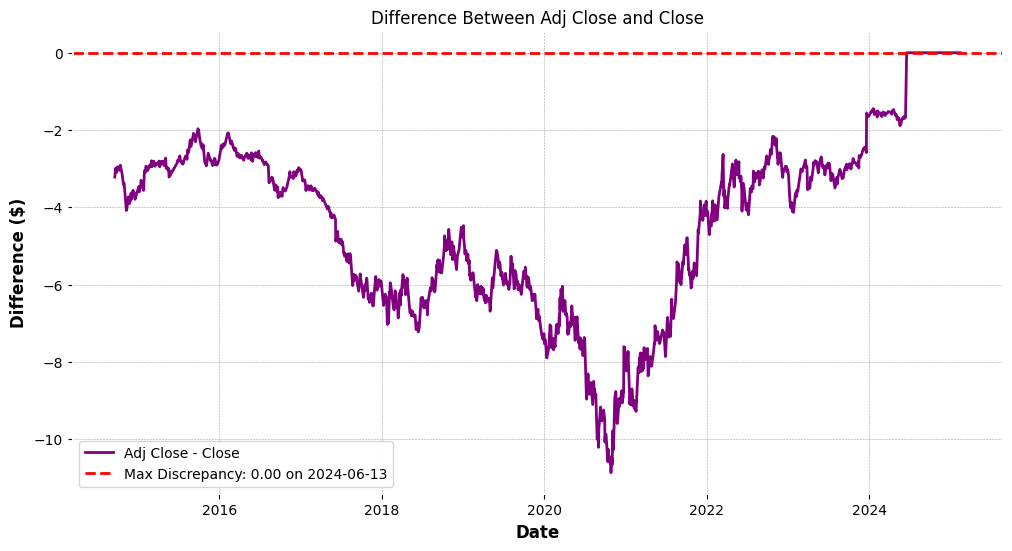

Largest Discrepancy: 0.0000 on 2024-06-13


In [17]:
# Compute difference
df['Close Difference'] = df['Adj Close'] - df['Close']

# Find the largest discrepancy
max_discrepancy = df['Close Difference'].max()
max_date = df['Close Difference'].idxmax()

# Plot the difference over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close Difference'], label='Adj Close - Close', color='purple')
plt.axhline(y=max_discrepancy, color='red', linestyle='--', label=f'Max Discrepancy: {max_discrepancy:.2f} on {max_date.date()}')

plt.title("Difference Between Adj Close and Close")
plt.xlabel("Date")
plt.ylabel("Difference ($)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Largest Discrepancy: {max_discrepancy:.4f} on {max_date.date()}")
